In [1]:
import flowmap.formats.ugrid
from tvtk.api import tvtk
import geojson
import matplotlib.pyplot as plt
import numpy as np
import shapely.geometry
from tvtk.common import configure_input, configure_source_data
import networkx
import rasterio.mask
import geojson


%matplotlib inline

In [2]:
grid = flowmap.formats.ugrid.UGrid(path='/Users/baart_f/data/rijnland/vanGovert/Groesbeek/groesbeek_map.nc', src_epsg=28992)
dem = flowmap.dem.read_dem('/Users/baart_f/data/rijnland/vanGovert/Groesbeek/aw_ahn_d_asc.tiff')
crs = geojson.crs.Named(properties={"name": "urn:ogc:def:crs:EPSG::{:d}".format(grid.src_epsg)})

In [3]:
is_grid = grid.build_is_grid(dem)

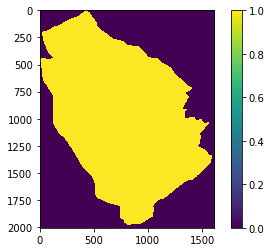

In [4]:
plt.imshow(is_grid[::10, ::10])
plt.colorbar()